<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice MLR using the Sacramento Real Estate Data

_Authors: Joseph Nelson (DC), Matt Brems (DC)_

---

We return to the Sacramento real estate data, but this time around we will be constructing multiple linear regression models. 

You will review the assumptions of multiple linear regression and practice building a model using the statsmodels package.

### 1. Load the data. 

In [30]:
import pandas as pd

shd_csv = './datasets/sacramento_real_estate_transactions_Clean.csv'


## Dummy Variables

---

It is important to be cautious with categorical variables, those that represent distict groups or categories, when building a regression. If put in a regression "as-is", categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 2. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [33]:
# A:
df=pd.read_csv(shd_csv)


In [34]:
df_type=pd.get_dummies(df['type'])
#get dummy variable for type of house

In [35]:
df=pd.concat([df,df_type],axis=1)

In [36]:
df.head()

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential,Unkown
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1,0
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1,0
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1,0
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1,0
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1,0


---

### A caution with dummy-coding

Let's touch on a caution moving forward and interpreting these.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> Scenario 1: Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 3. Remove "Unkown" from your dummy coded variable dataframe and append the rest to the original data.

In [40]:
# A:
df.drop('Unkown',axis=1)

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1
5,5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,1,0,0
6,6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,0,0,1
7,7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,0,0,1
8,8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,1,0,0
9,9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,0,0,1


### 4. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

You may use either `sklearn` or `statsmodels` to do this.

In [77]:
# A:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
lm = linear_model.LinearRegression()
X=df[['beds','baths','sq__ft','Residential']].values
y=df['price']
model = lm.fit(X, y)

In [67]:
model.coef_

array([ -1.18379489e+04,   6.60368202e+04,   1.85639968e+01,
         6.26275217e+04])

In [68]:
model.intercept_

68503.077026303014

In [85]:
import statsmodels.formula.api as sm
result = sm.ols(formula="price ~ beds + baths + sq__ft + Residential", data=df).fit()
print(result.params)

Intercept      68503.077026
beds          -11837.948903
baths          66036.820237
sq__ft            18.563997
Residential    62627.521676
dtype: float64


### 5. Plot the residuals against the true points to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [75]:
# A:
predictions  =  model.predict(X)

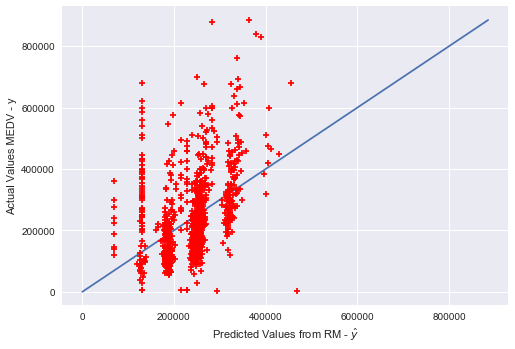

In [80]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

### 6. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [109]:
# A:
#Linerity
#Independence
#Equal Variance
#Normality
#Multicollinearity

### 7. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [81]:
# A:
corr_df=df[['beds','baths','sq__ft','Residential','price']].corr()
corr_df

,beds,baths,sq__ft,Residential,price
beds,1.000000,0.839594,0.684261,0.148876,0.342152
baths,0.839594,1.000000,0.665654,0.058997,0.416225
sq__ft,0.684261,0.665654,1.000000,0.101372,0.333861
Residential,0.148876,0.058997,0.101372,1.000000,0.134179
price,0.342152,0.416225,0.333861,0.134179,1.000000


In [82]:
import statsmodels.formula.api as sm
result = sm.ols(formula="price ~ beds + baths + sq__ft + Residential", data=df).fit()

In [83]:
print(result.params)

Intercept      68503.077026
beds          -11837.948903
baths          66036.820237
sq__ft            18.563997
Residential    62627.521676
dtype: float64


In [86]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     58.56
Date:                Mon, 16 Oct 2017   Prob (F-statistic):           2.39e-44
Time:                        15:54:53   Log-Likelihood:                -12939.
No. Observations:                 984   AIC:                         2.589e+04
Df Residuals:                     979   BIC:                         2.591e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     6.85e+04   1.68e+04      4.066      

In [87]:
#p-value for variables are all <0.05. Linearity √
#There are strong multicollinearity or other numerical problems.
#not normal

### 8. Explain what the intercept in your model means in the context of your predictor variables.

In [8]:
# A:

The price of a 0 bathroom and bedroom, 0 sqft and non-residential house is 68503.07. 

### 9. Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` function.

In [96]:
result.conf_int(alpha=0.05)

,0,1
Intercept,35442.882176,101563.271876
beds,-23550.834989,-125.062818
baths,49428.629534,82645.010941
sq__ft,5.680949,31.447044
Residential,31080.555497,94174.487855


In [88]:
# A:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     58.56
Date:                Mon, 16 Oct 2017   Prob (F-statistic):           2.39e-44
Time:                        16:00:59   Log-Likelihood:                -12939.
No. Observations:                 984   AIC:                         2.589e+04
Df Residuals:                     979   BIC:                         2.591e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     6.85e+04   1.68e+04      4.066      

In [99]:
predict_mean=np.mean(predictions)
predict_sem=np.std(predictions)/np.sqrt(len(predictions))
z=1.96

In [100]:
upper=predict_mean+z*predict_sem
lower=predict_mean-z*predict_sem
print(lower,upper)

230369.211994 237966.470933


### 10. [Bonus] Summarize your findings.

You work for a real estate agency. You are asked to prepare an executive summary for your very busy boss highlighting the most important findings from your MLR model. Convey these findings in no more than two paragraphs. Be sure to briefly address any potential shortcomings of your model.


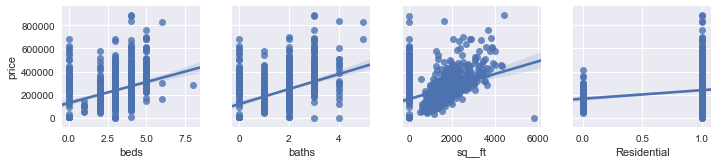

In [108]:
# A: 
sns.pairplot(df,x_vars=['beds','baths','sq__ft','Residential'],
             y_vars=['price'],kind="reg")
sns.plt.show()

Price has positive relationship with beds, baths, sq__ft, and Residential.
Beds, baths, sq__ft, and Residential are statistical significant variables to Price.
The model is significant.